# k-Nearest Neighbour Classifier
***
It is strange to only use the label of the nearest image when we wish to make a prediction. Indeed, it is almost always the case that one can do better by using what’s called a k-Nearest Neighbor Classifier. The idea is very simple: instead of finding the single closest image in the training set, we will find the top k closest images, and have them vote on the label of the test image. In particular, when k = 1, we recover the Nearest Neighbor classifier. Intuitively, higher values of k have a smoothing effect that makes the classifier more resistant to outliers:
![figure 1](./images/boundaries.png)

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. A useful technique can be to assign weight to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor. A commonly used distance metric for continuous variables is Euclidean distance. For discrete variables, such as for text classification, another metric can be used, such as the overlap metric (or Hamming distance).

## Validation sets for Hyperparameter tuning
***
The k-nearest neighbor classifier requires a setting for k. But what number works best? Additionally, we saw that there are many different distance functions we could have used: L1 norm, L2 norm, there are many other choices we didn’t even consider (e.g. dot products). These choices are called **hyperparameters** and they come up very often in the design of many Machine Learning algorithms that learn from data. It’s often not obvious what values/settings one should choose.

We might be tempted to suggest that we should try out many different values and see what works best. But, doing this will result in _overfitting_ the testcase. **We cannot use the test set for the purpose of tweaking hyperparameters.** There is a correct way of tuning the hyperparameters and it does not touch the test set at all. The idea is to split our training set in two: a slightly smaller training set, and what we call a _validation set_.
***

### Problem 1: Classifying Points
Given some data points (in 2D space) with their color labels, design a kNN classifier to assign a color label to the test point.

Given data points:

|Sno| Coordinates| Color|
|:---:| :----------: | :----: |
|1. | (1, 1)     | red  |
|2. | (2, 2.5)   | red  |
|3. | (3, 1.2)   | red  |
|4. | (5.5, 6.3) | blue |
|5. | (6, 9)     | blue |
|6. | (7, 6)     | blue |

Test data:

|Sno| Coordinates| Color| True Value |
|:---:| :----------: | :----: |:----:|
|1.   | (3, 4)       | ?      | red|


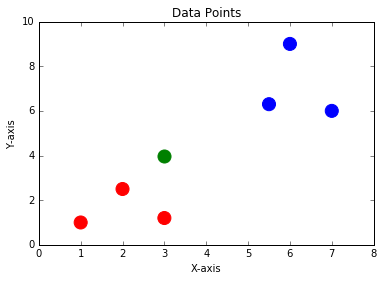

The given test point belongs to class with color: red


In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt

# define training data
training_data = np.array([[1,1], [2,2.5], [3,1.2], [5.5,6.3], [6,9], [7, 6]])
training_labels = ['red', 'red', 'red', 'blue', 'blue', 'blue']

# define test data
test_data = [3, 4]

# Plot the training and test points
plt.figure()
plt.scatter(training_data[:, 0], training_data[:, 1], color = training_labels[:], s = 170)
plt.scatter(test_data[0], test_data[1], color = 'green', s = 170)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Points')
plt.show()


# define distance function
def euclidian_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# process of calculating the distance of test instance from all items of training set
# function that returns k nearest neighbors from the training set for a given test instance
def getNeighbours(trainingSet, testInstance, k):
    distances = []
    for i in range(len(trainingSet)):
        dist = euclidian_distance(trainingSet[i], testInstance)
        distances.append((trainingSet[i], training_labels[i], dist))
    
    # sort in accending order w.r.t distance
    distances.sort(key = operator.itemgetter(2))
    neighbours = []
    
    for i in range(k):
        neighbours.append((distances[i][1], 1/distances[i][2]))
    return neighbours


# Once we have located the most similar neighbors for a test instance, 
# the next task is to devise a predicted response based on those neighbors.
# We can do this by allowing each neighbor to vote for their class attribute,
# and take the majority vote as the prediction.
# value of each vote depends upon its weight (calculated as 1/distance)
# Below provides a function for getting the majority voted response from a number of neighbors.       
def getResponse(neighbours):
    classVotes = {}
    for x in range(len(neighbours)):
        response = neighbours[x][0]
        if response in classVotes:
            classVotes[response] += 1 * neighbours[x][1]
        else:
            classVotes[response] = 1 * neighbours[x][1]
    # sort the votes in decending order and take the label with maxm votes
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

# using k = 3
neighbours = getNeighbours(training_data, test_data, 3)
print('The given test point belongs to class with color:', getResponse(neighbours))


### Problem 2: Classifying Images:
***
Design a kNN classifier to correctly identify digits from a dataset of tens of thousands of handwritten images.
Define two cases with different number of data values for training the model and output the accuracy of the model in each case.

**Given**: Use the [Digit dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) : Sklearn is a Python modules for machine learning. This module comes with a few standard datasets, such as the digits dataset. This dataset is made up of 1797 8x8 images and contains two arrays _digits.images_ and _digits.target_.

Case 1: 100 data vales as training data <br>
Case 2: 1000 data values as training data

In [2]:
import numpy as np
import operator
import matplotlib.pyplot as plt

from sklearn import datasets
digits = datasets.load_digits()

# Define the distance function:
def euclidian_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# Define the accuracy function:
def getAccuracy(testInstance, predictions):
    correct = 0
    for i in range(len(testInstance)):
        if str(testInstance[i]) == predictions[i]:
            correct += 1
    return (correct / float(len(testInstance))) * 100.0

# process of calculating the distance of test instance from all items of training set
# function that returns k nearest neighbors from the training set for a given test instance
def getNeighbours(training_data, training_labels, testInstance, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidian_distance(training_data[i], testInstance)
        distances.append((training_data[i], training_labels[i], dist))
    
    # sort in accending order w.r.t distance
    distances.sort(key = operator.itemgetter(2))
    neighbours = []
    
    for i in range(k):
        neighbours.append((distances[i][1], 1/distances[i][2]))
    return neighbours

# Once we have located the most similar neighbors for a test instance, 
# the next task is to devise a predicted response based on those neighbors.
# We can do this by allowing each neighbor to vote for their class attribute,
# and take the majority vote as the prediction.
# value of each vote depends upon its weight (calculated as 1/distance)
# Below provides a function for getting the majority voted response from a number of neighbors.       
def getResponse(neighbours):
    classVotes = {}
    for x in range(len(neighbours)):
        response = str(neighbours[x][0])
        if response in classVotes:
            classVotes[response] += 1 * neighbours[x][1]
        else:
            classVotes[response] = 1 * neighbours[x][1]
    # sort the votes in decending order and take the label with maxm votes
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

# use fist 100 images as training data for case 1 and first 1000 images for case 2
training_data1 = digits.data[0:100]
training_labels1 = digits.target[0:100]
training_data2 = digits.data[0:1000]
training_labels2 = digits.target[0:1000]


# use random 100 values as test data
test_data = digits.data[1597:1697]
test_labels = digits.target[1597:1697]

# using k = 5
predictions1 = []
predictions2 = []
for i in range(len(test_data)):
    neighbours1 = getNeighbours(training_data1, training_labels1, test_data[i], 5)
    neighbours2 = getNeighbours(training_data2, training_labels2, test_data[i], 5)
    predictions1.append(getResponse(neighbours1))
    predictions2.append(getResponse(neighbours2))
    
print('Accuracy for Case 1:', getAccuracy(test_labels, predictions1))
print('Accuracy for Case 2:', getAccuracy(test_labels, predictions2))

Accuracy for Case 1: 83.0
Accuracy for Case 2: 90.0


### Problem 3: Classification of Iris Dataset:
***
Fisher’s Iris data base (Fisher, 1936) is perhaps the best known
database to be found in the pattern recognition literature. The data
set contains 3 classes of 50 instances each, where each class refers
to a type of iris plant. One class is linearly separable from the other
two; the latter are not linearly separable from each other.
The data base contains the following attributes:<br>
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica Design
    
Design a kNN classifier to classify the given test spicies as belonging to one of the class

In [3]:
import csv
import operator
import random
import numpy as np

# Load the IRIS dataset csv file and convert the data into a list of lists (2D array),
# make sure the data file is in the current working directory
# Randomly split dataset to training and testing data
def loadDataset(filename, split, training_set=[], test_set=[]):
    with open(filename, 'rt') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        
        for i in range(len(dataset)-1):
            for j in range(4):
                dataset[i][j] = float(dataset[i][j])
                
            if random.random() < split:
                training_set.append(dataset[i])
            else:
                test_set.append(dataset[i])
            
# function to calculate euclidian distance between two point;
# this distance gives a measure of similarity between the two
def euclidianDistance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# process of calculating the distance of test instance from all items of training set
# function that returns k nearest neighbors from the training set for a given test instance
def getNeighbours(training_set, test_instance, k):
    distance = []
    for i in range(len(training_set)):
        dist = euclidianDistance(np.array(training_set[i][:-1]), np.array(test_instance[:-1]))
        if dist == 0:
            dist = 0.000000009
        distance.append((training_set[i], dist))
    
    distance.sort(key=operator.itemgetter(1))
    neighbours = []
    for i in range(len(distance)):
        neighbours.append((distance[i][0], 1/distance[i][1]))
    return neighbours


# Once we have located the most similar neighbors for a test instance, 
# the next task is to devise a predicted response based on those neighbors.
# We can do this by allowing each neighbor to vote for their class attribute,
# and take the majority vote as the prediction.
# value of each vote depends upon its weight (calculated as 1/distance)
# Below provides a function for getting the majority voted response from a number of neighbors.       
def getResponse(neighbours):
    classVotes = {}
    for x in range(len(neighbours)):
        response = neighbours[x][0][-1]
        if response in classVotes:
            classVotes[response] += 1 * neighbours[x][1]
        else:
            classVotes[response] = 1 * neighbours[x][1]
    # sort the votes in decending order and take the label with maxm votes
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

# Define the accuracy function:
def getAccuracy(test_set, predictions):
    correct = 0
    for i in range(len(test_set)):
        if test_set[i][-1] == predictions[i]:
            correct += 1
    return (correct / len(test_set)) * 100.0

def main():
    # prepare data
    training_set = []
    test_set = []
    # 2/3 for training and 1/3 for testing
    split = 0.67
    loadDataset('iris.data.csv', split, training_set, test_set)
    print('Train set: ' + repr(len(training_set)))
    print('Test set: ' + repr(len(test_set)))
    # generate predictions
    predictions = []
    k = 3
    for x in range(len(test_set)):
        neighbours = getNeighbours(training_set, test_set[x], k)
        result = getResponse(neighbours)
        predictions.append(result)
        print('{}. predicted='.format(x+1) + repr(result) + ', actual=' + repr(test_set[x][-1]))
    accuracy = getAccuracy(test_set, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    

main()

Train set: 103
Test set: 47
1. predicted='Iris-setosa', actual='Iris-setosa'
2. predicted='Iris-setosa', actual='Iris-setosa'
3. predicted='Iris-setosa', actual='Iris-setosa'
4. predicted='Iris-setosa', actual='Iris-setosa'
5. predicted='Iris-setosa', actual='Iris-setosa'
6. predicted='Iris-setosa', actual='Iris-setosa'
7. predicted='Iris-setosa', actual='Iris-setosa'
8. predicted='Iris-setosa', actual='Iris-setosa'
9. predicted='Iris-setosa', actual='Iris-setosa'
10. predicted='Iris-setosa', actual='Iris-setosa'
11. predicted='Iris-setosa', actual='Iris-setosa'
12. predicted='Iris-setosa', actual='Iris-setosa'
13. predicted='Iris-setosa', actual='Iris-setosa'
14. predicted='Iris-setosa', actual='Iris-setosa'
15. predicted='Iris-setosa', actual='Iris-setosa'
16. predicted='Iris-versicolor', actual='Iris-versicolor'
17. predicted='Iris-versicolor', actual='Iris-versicolor'
18. predicted='Iris-versicolor', actual='Iris-versicolor'
19. predicted='Iris-versicolor', actual='Iris-versicolor'

## Pros of kNN Classifier:
***
- It is very simple to implement and understand
- The classifier takes no time to train, since all that is required is to store and possibly index the training data
- Naturally handles multi-class cases. (_KNN works just as easily with multiclass data sets whereas other algorithms are hardcoded for the binary setting._)
- New training examples can be added easily. 
- The non-parametric nature of KNN gives it an edge in certain settings where the data may be highly “unusual”.

## Cons of kNN Classifier:
***
- Comparitively higher computational cost since classifying a test example requires a comparison to every single training example.
- Not appropriate for high-dimensional objects since distances over high-dimensional spaces can be very counter-intuitive (_The accuracy of KNN can be severely degraded with high-dimension data because there is little difference between the nearest and farthest neighbors._)
- KNN can suffer from skewed class distributions. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common). 